# Академия Аналитиков Авито

# Эконометрика

# Домашняя работа №1

## №1 (20 баллов)

- Задача минимизации для множественной регресии выглядит вот так:
$$(Y - X\hat{\beta})'(Y - X\hat{\beta}) \rightarrow \min_{\hat{\beta}}$$
- Решите эту задачу минимизации и выведите формулу для оценок коэффициентов $\hat{\beta}$

### Решение

Запишем функцию ошибки в виде:
$$L=(Y - X\hat{\beta})'(Y - X\hat{\beta})=YY' - Y'X\hat{\beta} - \hat{\beta}'X'Y + \hat{\beta}'X'X\hat{\beta}=  YY' - 2\hat{\beta}'X'Y + \hat{\beta}'X'X\hat{\beta}$$
Продифференцируем по $\hat{\beta}$:
$$\frac{\partial L}{\partial \hat{\beta}}=-2X'Y + X'X\hat{\beta} + \hat{\beta}'X'X = -2X'Y + 2X'X\hat{\beta}$$
Приравняем $\frac{\partial L}{\partial \hat{\beta}}$ к нулю и получим выражение для $\hat{\beta}$:
$$-2X'Y + 2X'X\hat{\beta} = 0 \rightarrow \hat{\beta}=(X'X)^{-1}X'Y$$

## №2 (40 баллов)

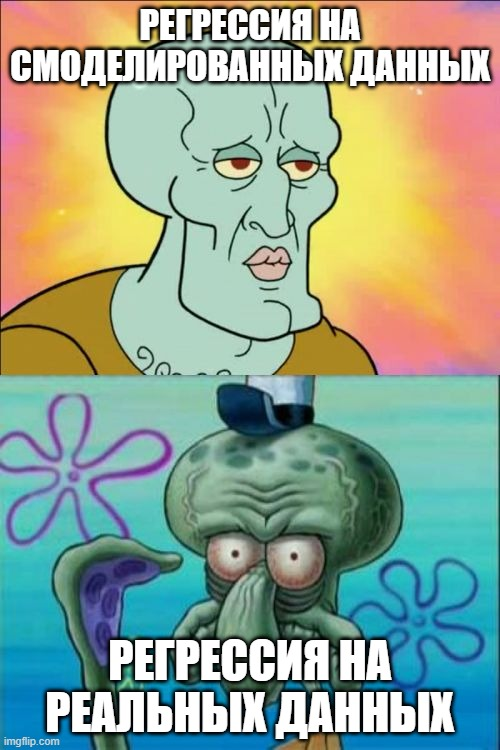

- У нас есть следующий датасет (`HW_001_001.csv`)
- Нам хочется понять, насколько уровень загрязнения воздуха (диоксид азота $NO_2$ в данном случае) влияет на результаты тестов внимания школьников. В данном домашнем задании будем смотреть на **время реакции**.
- Данные собирались в течение периода с января 2012 г. по март 2013 г. в Барселоне. В исследовании приняли участие 39 школ.
    - `react` - время реакции (ms)
    - `correct` - количество верных ответов
    - `omissions` - были ли тест не сдан
    - `no2_class` - уровень $NO_2$ в классе
    - `no2_home` - уровень $NO_2$ дома
    - `age` - возраст на момент исследования
    - `age0` - возраст поступления в школу
    - `sex` - пол
    - `grade` - класс
    - `overweight` - степень ожирения согласно ВОЗ
    - `lbweight` - весовая категория при рождении
    - `breastfeed` - продолжительность кормления грудью
    - `msmoke` - курила ли мать во время беременности
    - `meducation` - уровень образования матери
    - `feducation` - уровень образования отца
    - `siblings_old` - количество братьев\сестер старшего возраста
    - `siblings_young` - количество братьев\сестер младшего возраста
    - `sev_home` - социально-экономический индекс домашнего района
    - `green_home` - [степень озеленения домашнего района](https://earthobservatory.nasa.gov/features/MeasuringVegetation/measuring_vegetation_2.php#:~:text=Normalized%20Difference%20Vegetation%20Index%20(NDVI,up%20the%20spectrum%20of%20sunlight)
    - `noise_school` - уровень шума в школе (дБ)
    - `sev_school` - социально-экономический индекс школы
    - `precip` - осадки

In [1]:
import pandas as pd

In [2]:
df_matrix = pd.read_csv('HW_001_001.csv')

In [3]:
df_matrix.head()

,react,correct,omissions,no2_class,no2_home,age,age0,sex,grade,overweight,...,msmoke,meducation,feducation,siblings_old,siblings_young,sev_home,green_home,noise_school,sev_school,precip
0,764.584000,125.0,2.0,16.087734,26.794014,10.340862,8.0,Female,4th,Normal weight,...,No smoking,Secondary,Secondary,1.0,0.0,0.838710,0.426315,35.2,0.645161,0.3
1,855.818898,127.0,1.0,16.087734,33.398342,10.234086,3.0,Female,4th,Normal weight,...,No smoking,University,Secondary,0.0,1.0,0.290323,0.228674,35.2,0.645161,0.3
2,932.983051,118.0,4.0,16.087734,29.154180,9.015742,3.0,Male,3rd,Normal weight,...,No smoking,University,University,0.0,1.0,0.612903,0.298590,35.2,0.645161,0.3
3,506.440945,127.0,0.0,16.087734,25.067272,10.428473,3.0,Female,4th,Overweight,...,No smoking,University,Secondary,0.0,1.0,0.483871,0.360645,35.2,0.645161,0.3
4,580.301587,126.0,0.0,16.087734,30.572056,9.330595,6.0,Male,3rd,Normal weight,...,No smoking,University,University,1.0,0.0,0.612903,0.239222,35.2,0.645161,0.3


- Во-первых, посмотрите на описательные статистики

In [4]:
df_matrix.describe()

,react,correct,omissions,no2_class,no2_home,age,age0,siblings_old,siblings_young,sev_home,green_home,noise_school,sev_school,precip
count,1084.000000,1084.000000,1084.000000,1089.000000,1089.000000,1089.000000,1082.000000,1081.000000,1083.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.00000
mean,742.480809,121.826568,1.728782,30.167792,54.718322,9.087880,3.218022,0.573543,0.565097,0.419681,0.198072,37.963545,0.409639,0.55932
std,145.444639,7.001609,3.812825,9.895886,18.047859,0.886907,1.293168,0.675225,0.690683,0.199914,0.077777,4.491651,0.206439,1.23640
min,434.071429,60.000000,0.000000,7.794096,2.076335,7.452430,0.000000,0.000000,0.000000,0.064516,0.018428,28.800000,0.129032,0.00000
25%,632.705707,120.000000,0.000000,22.818430,44.562218,8.364134,3.000000,0.000000,0.000000,0.258064,0.145698,34.100000,0.225806,0.00000
50%,719.478375,124.000000,1.000000,29.910334,54.268135,9.067761,3.000000,0.000000,0.000000,0.387097,0.167832,38.000000,0.387097,0.00000
75%,839.835675,126.000000,2.000000,36.598255,61.743267,9.746749,3.000000,1.000000,1.000000,0.580645,0.227337,41.700000,0.612903,0.10000
max,1303.259843,128.000000,50.000000,52.563970,118.656770,11.633128,9.000000,4.000000,6.000000,0.967742,0.525868,51.100000,0.838710,5.80000


- Какие выводы вы можете сделать?

Выводы:
- Видим, что есть пропуски в данных (`react`, `correct`, `omissions`, `age0`,	`siblings_old`,	`siblings_young`).
- В целевой переменной наблюдается признак ассиметрии (большие значения немного сдвигают среднее относительно медианы). В других интересующих нас переменных (`no2_class`, `no2_home`) явной ассиметрии нет (среднее значение похоже на медиану).  
- Есть переменные, в которых присутствуют выбросы больших значений, сдвигающих среднее относительно медианы (например, `omissions`, `siblings_young`)
- Есть переменные с малым количеством уникальных значений (`omissions	`, `age0`, `siblings_old`, `siblings_young`).

- Во-вторых, надо бы нарисовать что-нибудь
- С какой переменной вы бы начали? Какой график бы использовали?
- Нарисуйте 

Начнем с целевой переменной - `react`. Построим гистограмму распределения:

<AxesSubplot:>

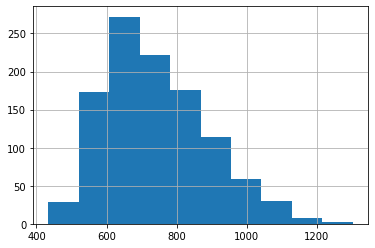

In [5]:
df_matrix['react'].hist()

- Какой вывод вы можете сделать?

Распределение целевой переменной имеет колоколообразный вид, слегка вытянутый вправо (не нормальное распределение). Как вариант, можно было бы применить логарифмическое преобразование, но думаю, что тут это необязательно.

- Теперь посмотрим на, так называемый, `heatmap`. Если простыми словами, то это просто красивая корреляционная матрица

In [7]:
# Самый простой способ сделать heatmap - взять из библиотеки seaborn
import seaborn as sns
import matplotlib.pyplot as plt

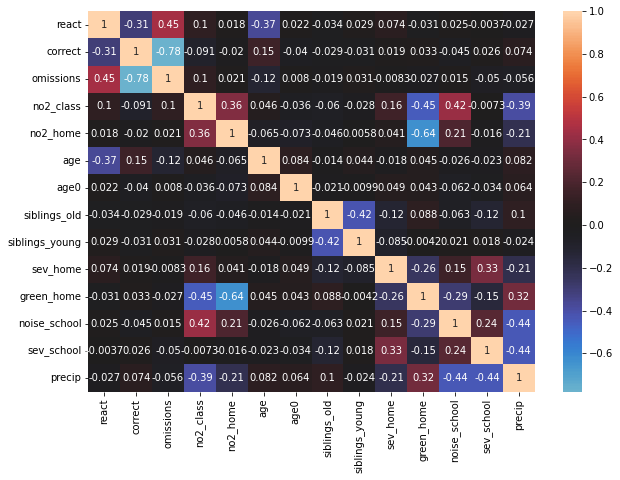

In [8]:
plt.figure(figsize=(10, 7))
sns.heatmap(df_matrix.corr(), center=0, annot=True);

- Какой вывод можно сделать?

Скорелированных переменных не так много. Целевая переменная (`react`) отрицательно коррелирует с `correct` и `age` (чем быстрее ребенок отвечает, тем меньше он дает правильных ответов, а также чем он старше, тем меньше скорость его реакции - скорее всего начинает думать над ответами). Положительная корреляция заметна только с `omissions`.  
Переменные `no2_class` и `no2_home` умеренно скоррелированы между собой, но при этом, почти не коррелируют с целевой переменной `react` => вряд ли уровень загрязнения воздуха (диоксид азота $NO_2$ в данном случае) заметно влияет на результаты тестов внимания школьников.  
Наблюдается сильная корреляция `correct` и `omissions` - в одной модели их использовать не стоит.

- Подумайте над гипотезами о взаимосвязи между зависимой переменной и регрессорами (как переменная X *может влиять* на Y)
- Преобразуйте переменные, если необходимо
- Постройте первую версию модели

Построим графики зависимостей целевой переменной от всех имеющихся регрессоров:

C:\Users\TEMP\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


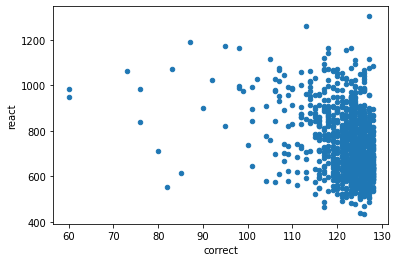

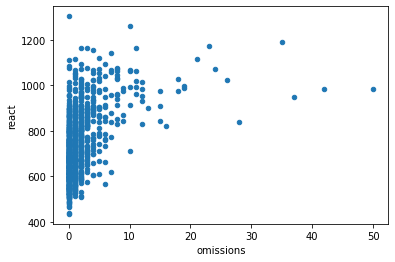

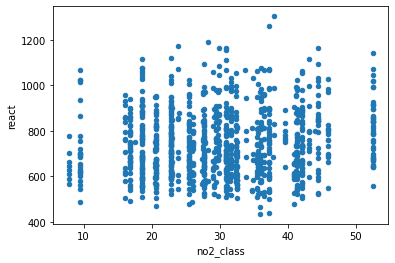

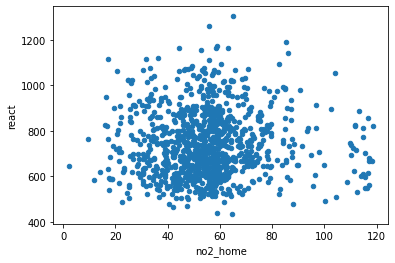

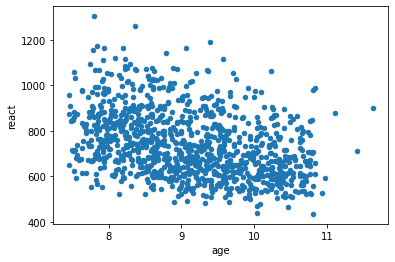

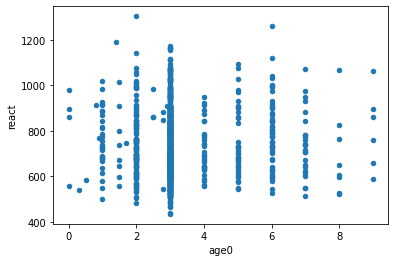

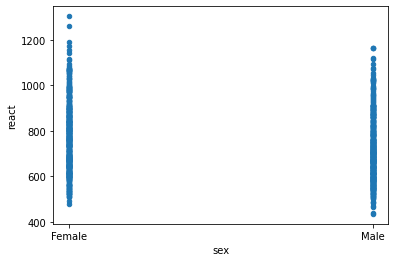

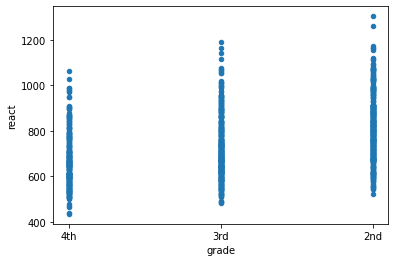

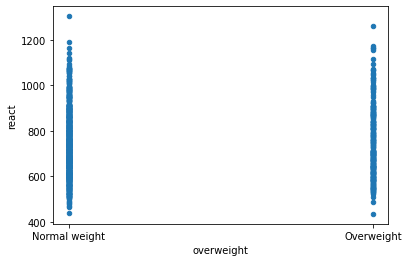

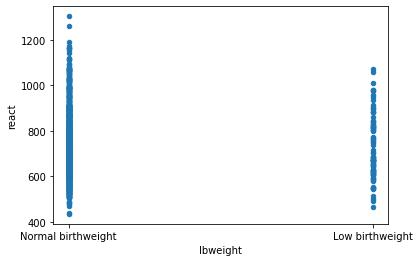

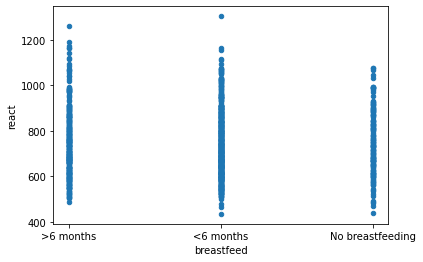

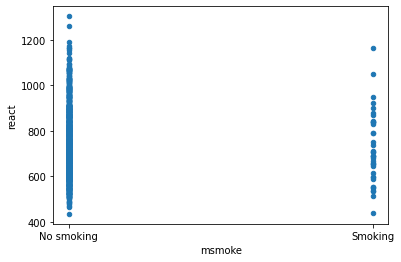

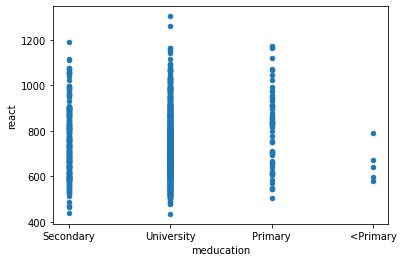

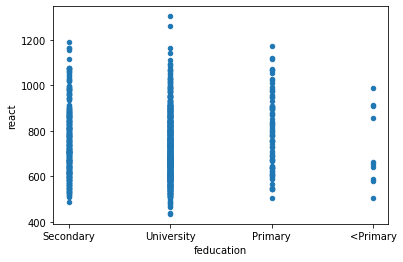

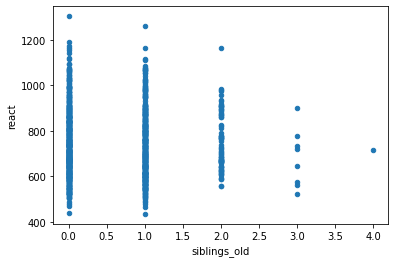

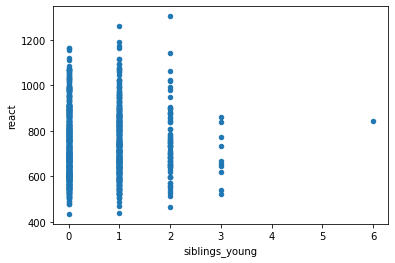

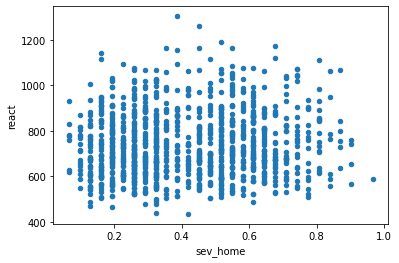

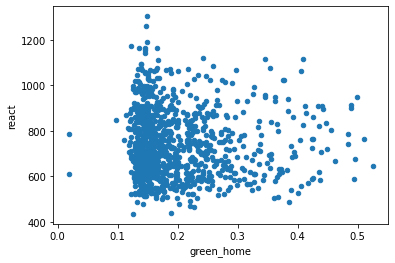

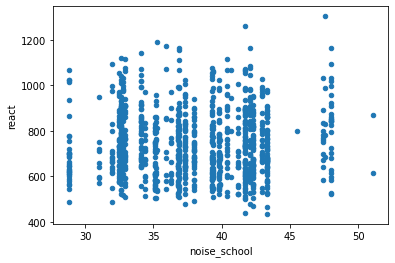

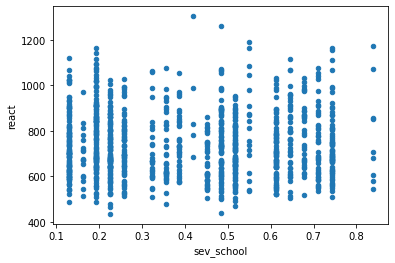

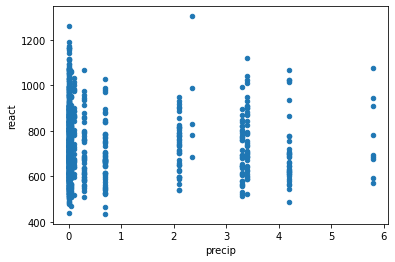

In [9]:
df_without_nan = df_matrix.dropna()
for column in df_without_nan.columns:
    if column != 'react':
        df_without_nan.plot.scatter(x=column, y='react')

In [10]:
df_matrix.columns

Index(['react', 'correct', 'omissions', 'no2_class', 'no2_home', 'age', 'age0',
       'sex', 'grade', 'overweight', 'lbweight', 'breastfeed', 'msmoke',
       'meducation', 'feducation', 'siblings_old', 'siblings_young',
       'sev_home', 'green_home', 'noise_school', 'sev_school', 'precip'],
      dtype='object')

Гипотезы о зависимостях (их не так много - кажется, что малое количество регрессоров влияют на целевую переменную явным образом):
- `omissions` выглядит как логарифм
- `green_home` выглядит как обратная зависимость (1/x) 

Категориальные переменные закодируем с помощью One Hot Encoding-a.
В первую версию модели поместим все имеющиееся регрессоры.

In [11]:
import numpy as np
df = pd.DataFrame()
df['react'] = np.log(df_without_nan['react'])
df['correct'] = df_without_nan['correct']
df['omissions'] = np.log1p(df_without_nan['omissions'])
df['no2_class'] = df_without_nan['no2_class']
df['no2_home'] = df_without_nan['no2_home']
df['age'] = df_without_nan['age']
df['age0'] = df_without_nan['age0']
df = pd.concat([df, pd.get_dummies(df_without_nan.sex, prefix='sex')], axis=1)
df = pd.concat([df, pd.get_dummies(df_without_nan.grade, prefix='grade')], axis=1)
df = pd.concat([df, pd.get_dummies(df_without_nan.overweight, prefix='overweight')], axis=1)
df = pd.concat([df, pd.get_dummies(df_without_nan.lbweight, prefix='lbweight')], axis=1)
df = pd.concat([df, pd.get_dummies(df_without_nan.breastfeed, prefix='breastfeed')], axis=1)
df = pd.concat([df, pd.get_dummies(df_without_nan.msmoke, prefix='msmoke')], axis=1)
df = pd.concat([df, pd.get_dummies(df_without_nan.meducation, prefix='meducation')], axis=1)
df = pd.concat([df, pd.get_dummies(df_without_nan.feducation, prefix='feducation')], axis=1)
df = pd.concat([df, pd.get_dummies(df_without_nan.siblings_old.astype('Int64'), prefix='siblings_old')], axis=1)
df = pd.concat([df, pd.get_dummies(df_without_nan.siblings_young.astype('Int64'), prefix='siblings_young')], axis=1)
df['sev_home'] = df_without_nan['sev_home']
df['green_home'] = 1/df_without_nan['green_home']
df['noise_school'] = df_without_nan['noise_school']
df['sev_school'] = df_without_nan['sev_school']
df['precip'] = df_without_nan['precip']
df.head()

,react,correct,omissions,no2_class,no2_home,age,age0,sex_Female,sex_Male,grade_2nd,...,siblings_young_0,siblings_young_1,siblings_young_2,siblings_young_3,siblings_young_6,sev_home,green_home,noise_school,sev_school,precip
0,6.639332,125.0,1.098612,16.087734,26.794014,10.340862,8.0,1,0,0,...,1,0,0,0,0,0.838710,2.345682,35.2,0.645161,0.3
1,6.752059,127.0,0.693147,16.087734,33.398342,10.234086,3.0,1,0,0,...,0,1,0,0,0,0.290323,4.373029,35.2,0.645161,0.3
2,6.838387,118.0,1.609438,16.087734,29.154180,9.015742,3.0,0,1,0,...,0,1,0,0,0,0.612903,3.349071,35.2,0.645161,0.3
3,6.227408,127.0,0.000000,16.087734,25.067272,10.428473,3.0,1,0,0,...,0,1,0,0,0,0.483871,2.772811,35.2,0.645161,0.3
4,6.363548,126.0,0.000000,16.087734,30.572056,9.330595,6.0,0,1,0,...,1,0,0,0,0,0.612903,4.180212,35.2,0.645161,0.3


In [12]:
X = df.copy()
X.drop('react', axis=1, inplace=True)
X.head()

,correct,omissions,no2_class,no2_home,age,age0,sex_Female,sex_Male,grade_2nd,grade_3rd,...,siblings_young_0,siblings_young_1,siblings_young_2,siblings_young_3,siblings_young_6,sev_home,green_home,noise_school,sev_school,precip
0,125.0,1.098612,16.087734,26.794014,10.340862,8.0,1,0,0,0,...,1,0,0,0,0,0.838710,2.345682,35.2,0.645161,0.3
1,127.0,0.693147,16.087734,33.398342,10.234086,3.0,1,0,0,0,...,0,1,0,0,0,0.290323,4.373029,35.2,0.645161,0.3
2,118.0,1.609438,16.087734,29.154180,9.015742,3.0,0,1,0,1,...,0,1,0,0,0,0.612903,3.349071,35.2,0.645161,0.3
3,127.0,0.000000,16.087734,25.067272,10.428473,3.0,1,0,0,0,...,0,1,0,0,0,0.483871,2.772811,35.2,0.645161,0.3
4,126.0,0.000000,16.087734,30.572056,9.330595,6.0,0,1,0,1,...,1,0,0,0,0,0.612903,4.180212,35.2,0.645161,0.3


In [13]:
import statsmodels.api as sm
exog = sm.add_constant(X)
model_classic = sm.OLS(endog=df.react, exog=exog).fit()
model_classic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  react   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     24.28
Date:                Wed, 24 Aug 2022   Prob (F-statistic):          8.60e-105
Time:                        02:33:32   Log-Likelihood:                 552.08
No. Observations:                1036   AIC:                            -1036.
Df Residuals:                    1002   BIC:                            -868.1
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.3807      0.038     36.428      0.000       1.306       1.455
correct                         0.0033      0.001      3.728      0.000       0.002       0.005
omissions                       0.1392      0.009     16.211      0.000       0.122       0.156
no2_class                       0.0017      0.001      2.979      0.003       0.001       0.003
no2_home                       -0.0001      0.000     -0.511      0.609      -0.001       0.000
age                            -0.0289      0.013     -2.231      0.026      -0.054      -0.003
age0                            0.0050      0.004      1.387      0.166      -0.002       0.012
sex_Female                      0.7143      0.020     35.654      0.000       0.675       0.754
sex_Male                        0.6663      0.019     35.126      0.000       0.629       0.704
grade_2nd                       0.5120      0.012     41.147      0.000       0.488       0.536
grade_3rd                       0.4530      0.014     32.350      0.000       0.425       0.480
grade_4th                       0.4157      0.025     16.803      0.000       0.367       0.464
overweight_Normal weight        0.6945      0.020     35.350      0.000       0.656       0.733
overweight_Overweight           0.6862      0.020     34.702      0.000       0.647       0.725
lbweight_Low birthweight        0.6809      0.021     32.666      0.000       0.640       0.722
lbweight_Normal birthweight     0.6998      0.021     34.103      0.000       0.660       0.740
breastfeed_<6 months            0.4565      0.014     32.755      0.000       0.429       0.484
breastfeed_>6 months            0.4586      0.015     30.812      0.000       0.429       0.488
breastfeed_No breastfeeding     0.4656      0.015     30.402      0.000       0.436       0.496
msmoke_No smoking               0.7067      0.022     31.530      0.000       0.663       0.751
msmoke_Smoking                  0.6740      0.023     29.932      0.000       0.630       0.718
meducation_<Primary             0.2658      0.053      5.024      0.000       0.162       0.370
meducation_Primary              0.3906      0.024     16.284      0.000       0.344       0.438
meducation_Secondary            0.3671      0.022     17.064      0.000       0.325       0.409
meducation_University           0.3572      0.021     16.675      0.000       0.315       0.399
feducation_<Primary             0.2744      0.038      7.163      0.000       0.199       0.350
feducation_Primary              0.3796      0.020     18.880      0.000       0.340       0.419
feducation_Secondary            0.3704      0.018     20.781      0.000       0.335       0.405
feducation_University           0.3562      0.018     19.987      0.000       0.321       0.391
siblings_ol

- Значима ли регрессия в целом?
- Все ли переменные значимы? Если нет, то, какие ваши дальнейшие шаги?

**Prob (F-statistic):	9.46e-107 < $\alpha=0.05$** => регрессия значима в целом!  
На уровне значимости $\alpha=0.05$ многие регрессоры оказались незначимы (например, `no2_home` незначим т.к. имеет pvalue 0.545>0.05).  
Далее будем выкидывать такие регрессоры!

- Какой у вас получился $R^2, R^2_{adj}, AIC, BIC$?
- Попробуйте улучшить их

Получились следующие результаты (довольно плохие):
- $R^2=0.45, R^2_{adj}=0.431, AIC=1.269e+04, BIC=1.286e+04$  

Попробуем их улучшить путем выкидывания незначимых регрессоров:

In [14]:
exog=exog.drop(['no2_home', 'age0', 'grade_4th', 'grade_4th',
                  'siblings_old_0', 'siblings_old_1', 'siblings_old_2', 'siblings_old_3', 'siblings_old_4', 
                  'siblings_young_0', 'siblings_young_1', 'siblings_young_2', 'siblings_young_3', 'siblings_young_6', 
                 'sev_home', 'green_home', 'sev_school', 'noise_school', 'feducation_<Primary', 'meducation_<Primary', 'sex_Male'], axis=1)
exog.head()

,const,correct,omissions,no2_class,age,sex_Female,grade_2nd,grade_3rd,overweight_Normal weight,overweight_Overweight,...,breastfeed_No breastfeeding,msmoke_No smoking,msmoke_Smoking,meducation_Primary,meducation_Secondary,meducation_University,feducation_Primary,feducation_Secondary,feducation_University,precip
0,1.0,125.0,1.098612,16.087734,10.340862,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0.3
1,1.0,127.0,0.693147,16.087734,10.234086,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0.3
2,1.0,118.0,1.609438,16.087734,9.015742,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0.3
3,1.0,127.0,0.000000,16.087734,10.428473,1,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0.3
4,1.0,126.0,0.000000,16.087734,9.330595,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0.3


In [15]:
model_classic = sm.OLS(endog=df.react, exog=exog).fit()
model_classic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  react   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     41.00
Date:                Wed, 24 Aug 2022   Prob (F-statistic):          2.07e-111
Time:                        02:33:32   Log-Likelihood:                 542.50
No. Observations:                1036   AIC:                            -1045.
Df Residuals:                    1016   BIC:                            -946.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           2.1345      0.065     32.735      0.000       2.007       2.262
correct                         0.0033      0.001      3.715      0.000       0.002       0.005
omissions                       0.1389      0.009     16.258      0.000       0.122       0.156
no2_class                       0.0014      0.001      2.848      0.004       0.000       0.002
age                            -0.0278      0.013     -2.160      0.031      -0.053      -0.003
sex_Female                      0.0488      0.009      5.280      0.000       0.031       0.067
grade_2nd                       0.0968      0.029      3.342      0.001       0.040       0.154
grade_3rd                       0.0382      0.018      2.175      0.030       0.004       0.073
overweight_Normal weight        1.0706      0.033     32.395      0.000       1.006       1.135
overweight_Overweight           1.0640      0.033     32.198      0.000       0.999       1.129
lbweight_Low birthweight        1.0591      0.034     31.399      0.000       0.993       1.125
lbweight_Normal birthweight     1.0755      0.034     32.090      0.000       1.010       1.141
breastfeed_<6 months            0.7090      0.022     31.692      0.000       0.665       0.753
breastfeed_>6 months            0.7119      0.023     30.738      0.000       0.666       0.757
breastfeed_No breastfeeding     0.7137      0.023     30.517      0.000       0.668       0.760
msmoke_No smoking               1.0812      0.035     30.898      0.000       1.013       1.150
msmoke_Smoking                  1.0534      0.035     30.520      0.000       0.986       1.121
meducation_Primary              0.1177      0.069      1.696      0.090      -0.018       0.254
meducation_Secondary            0.0949      0.069      1.370      0.171      -0.041       0.231
meducation_University           0.0838      0.069      1.211      0.226      -0.052       0.219
feducation_Primary              0.1014      0.050      2.017      0.044       0.003       0.200
feducation_Secondary            0.0880      0.050      1.755      0.080      -0.010       0.186
feducation_University           0.0718      0.050      1.430      0.153      -0.027       0.170
precip                          0.0087      0.004      2.174      0.030       0.001       0.017
==============================================================================
Omnibus:                        5.729   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                5.646
Skew:                           0.179   Prob(JB):                       0.0594
Kurtosis:                       3.056   Cond. No.                     1.86e+18
==============================================================================

Notes:
[1] Stand

- По какой метрике вы бы решали, что ваша регрессия улучшилась?

Так как всравниваемых моделях используется различное количество регрессоров, то мы не можем использовать для их сравнения $R^2$ => нужно использовать $R^2_{adj}$, который делает поправку на количество регрессоров в модели (к тому же мы не применяли функционального преобразования на целевую переменную, которое бы не позволяло его использовать). В данном случае, он слегка ухудшился (0,430 вместо 0,431), хотя AIC и BIC слегка улучшились, что говорит о том, что мы все-таки на верном пути (AIC и BIC тоже учитывают в себе количество используемых регрессоров, штрафуя за их большое количество -> должны быть как можно меньше).

Возвращаясь к задаче выявления влияния уровеня загрязнения воздуха (диоксида азота $NO_2$ в данном случае) на результаты тестов внимания школьников, можно заметить, что переменная `no2_home` была убрана из модели как незначимая, а `no2_class` хоть и оказалась значимой, но имеет близкий к 0 коэффициент => все это говорит о том, что в нашей линейной модели загрязнение воздуха почти не влияет на результаты школьников. 

# №3 (40 баллов)

- Ладно, пришла пора для чего более сложного
- В этой задаче вы сами все решаете. Более того, у вас будут даже чужие ноутбуки
- Если вы проведете такой же анализ, что и выше, то балл за это задание будет равен 10/40
- Чтобы получить максимальный балл за это задание, то вам нужно будет провести полноценное исследование

- Итак, представьте себе следующую ситуацию
- Вы участвуете в создании продукта/модели по оценке стоимости недвижимости в стартапе 
- Вы - главный аналитик, который отвечает за создание модели и презентацию ее результатов
- Проблема в том, что вы единственный аналитик в команде. Все остальные члены команды **не имеют математического бэкграунда, они не знают никаких моделей, они никогда не занимались программированием**. Зато они очень хорошо разбираются в бизнесе
- Вы знаете, что для тестривания модели на первом этапе подойдет [этот](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) замечательный датасет (`HW_001_002.zip`). Там есть примеры различного анализа и моделей
- Но вы не можете просто взять примеры оттуда:
    - Во-первых, ваша модель должна быть линейной (хотя бы на первых порах, в будущем, после курса по ML, можете брать и нелинейные модели)
    - Во-вторых, ваша цель не просто предсказание цены на ту или иную недвижимости, а **описание механизма ценообразования на рынке**
    - В-третьих, вашей команде очень важно, чтобы результаты модели были адекватными. **За каждой из включенных переменных должна стоять гипотеза о том, почему эта переменная влияет на цену**. Значимость переменной не является достаточным объяснением о включении переменной в конечную модель
- Помните, что это лишь первая версия модели. Основая цель для текущего анализа - это понимание того, 
    - какие данные есть, 
    - как они "выглядят", 
    - какая получается модель, 
    - какие выводы можно сделать, 
    - насколько эти выводы адекватны и соответствуют вашим гипотезам,
    - как можно еще улучшить модель
- Еще важный момент. Вы отправите, получившееся исследование команде, поэтому оно не должно быть большим (время на прочтение и понимание того, что происходит, не должно занимать более 10-15 минут). Помните, что у команды есть и другие задачи, поэтому позаботьтесь, чтобы исследование было:
    - Структурированным. Можете использовать [классический](https://blogs.lse.ac.uk/impactofsocialsciences/2018/05/21/writing-a-page-turner-how-to-tell-a-story-in-your-scientific-paper/) подход к научному исследованию и добавить то, как делают [консультанты](https://strategyu.co/mckinsey-structured-problem-solving-secrets/)
    - Отвечало на поставленную задачу
    - Было самодостаточным (в одном jupyter файле, проще говоря)
    - Воспроизводимым (не будет `seed`, если/где надо, будет 0 за это задание)
    - Было не стыдно показать CEO и др. в стартапе (если графики будут без подписей осей и названия, как минимум, будет 0)

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [17]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [18]:
df_train.shape

(1460, 81)

Взглянем на целевую переменную `SalePrice`:

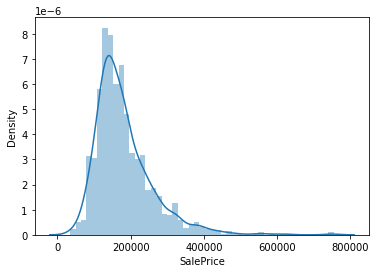

In [19]:
sns.distplot(df_train['SalePrice']);

Видим, что она имеет не нормальное распределение (ассиметрично) -> можно попробовать сделать log преобразование:

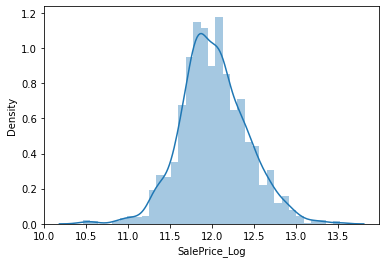

In [20]:
df_train['SalePrice_Log'] = np.log(df_train['SalePrice'])
sns.distplot(df_train['SalePrice_Log']);

После преобразования распределение стало напоминать нормальное.

In [21]:
numerical_feats = df_train.dtypes[df_train.dtypes != "object"].index
print("Количество числовых признаков: ", len(numerical_feats))

categorical_feats = df_train.dtypes[df_train.dtypes == "object"].index
print("Количество категориальных признаков: ", len(categorical_feats))

Количество числовых признаков:  39
Количество категориальных признаков:  43


In [22]:
df_train[numerical_feats].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SalePrice_Log
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,61,0,0,0,0,0,2,2008,208500,12.247694
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,0,5,2007,181500,12.109011
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,42,0,0,0,0,0,9,2008,223500,12.317167
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,35,272,0,0,0,0,2,2006,140000,11.849398
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,84,0,0,0,0,0,12,2008,250000,12.429216


In [23]:
df_train[categorical_feats].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


Видим, что есть пропущенные значения. Посмотрим как много их среди всех переменных:

Text(0.5, 1.0, 'Количество пропущенных значений')

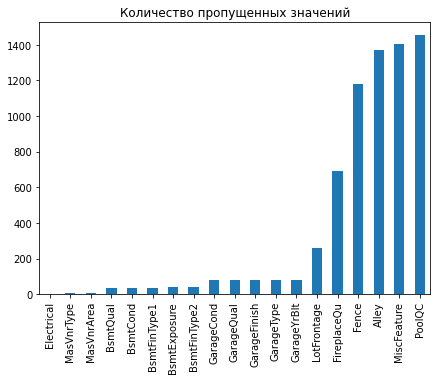

In [24]:
fig = plt.figure(figsize=(7, 5))
missing = df_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar();
plt.title('Количество пропущенных значений')

Видим, что NaN очень много для некоторых признаков. Однако, читая описание данных, мы обнаруживаем, что это не пропущенные данные: Для PoolQC NaN не означает отсутствие данных, а означает отсутствие бассейна, как и для Fence, FireplaceQu и т.д.   
Заменим такие пропуски строкой "None":

In [25]:
cols_fillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']

for col in cols_fillna:
    df_train[col].fillna('None',inplace=True)
    df_test[col].fillna('None',inplace=True)

Оставшиеся пропуки заполним средними значениями по соответсвующему признаку:

In [26]:
df_train.fillna(df_train.mean(), inplace=True)
df_test.fillna(df_test.mean(), inplace=True)

In [27]:
df_train.isnull().sum().sum(), df_test.isnull().sum().sum()

(0, 0)

Видим, что пропусков в данных больше нет

### Анализ числовых переменных

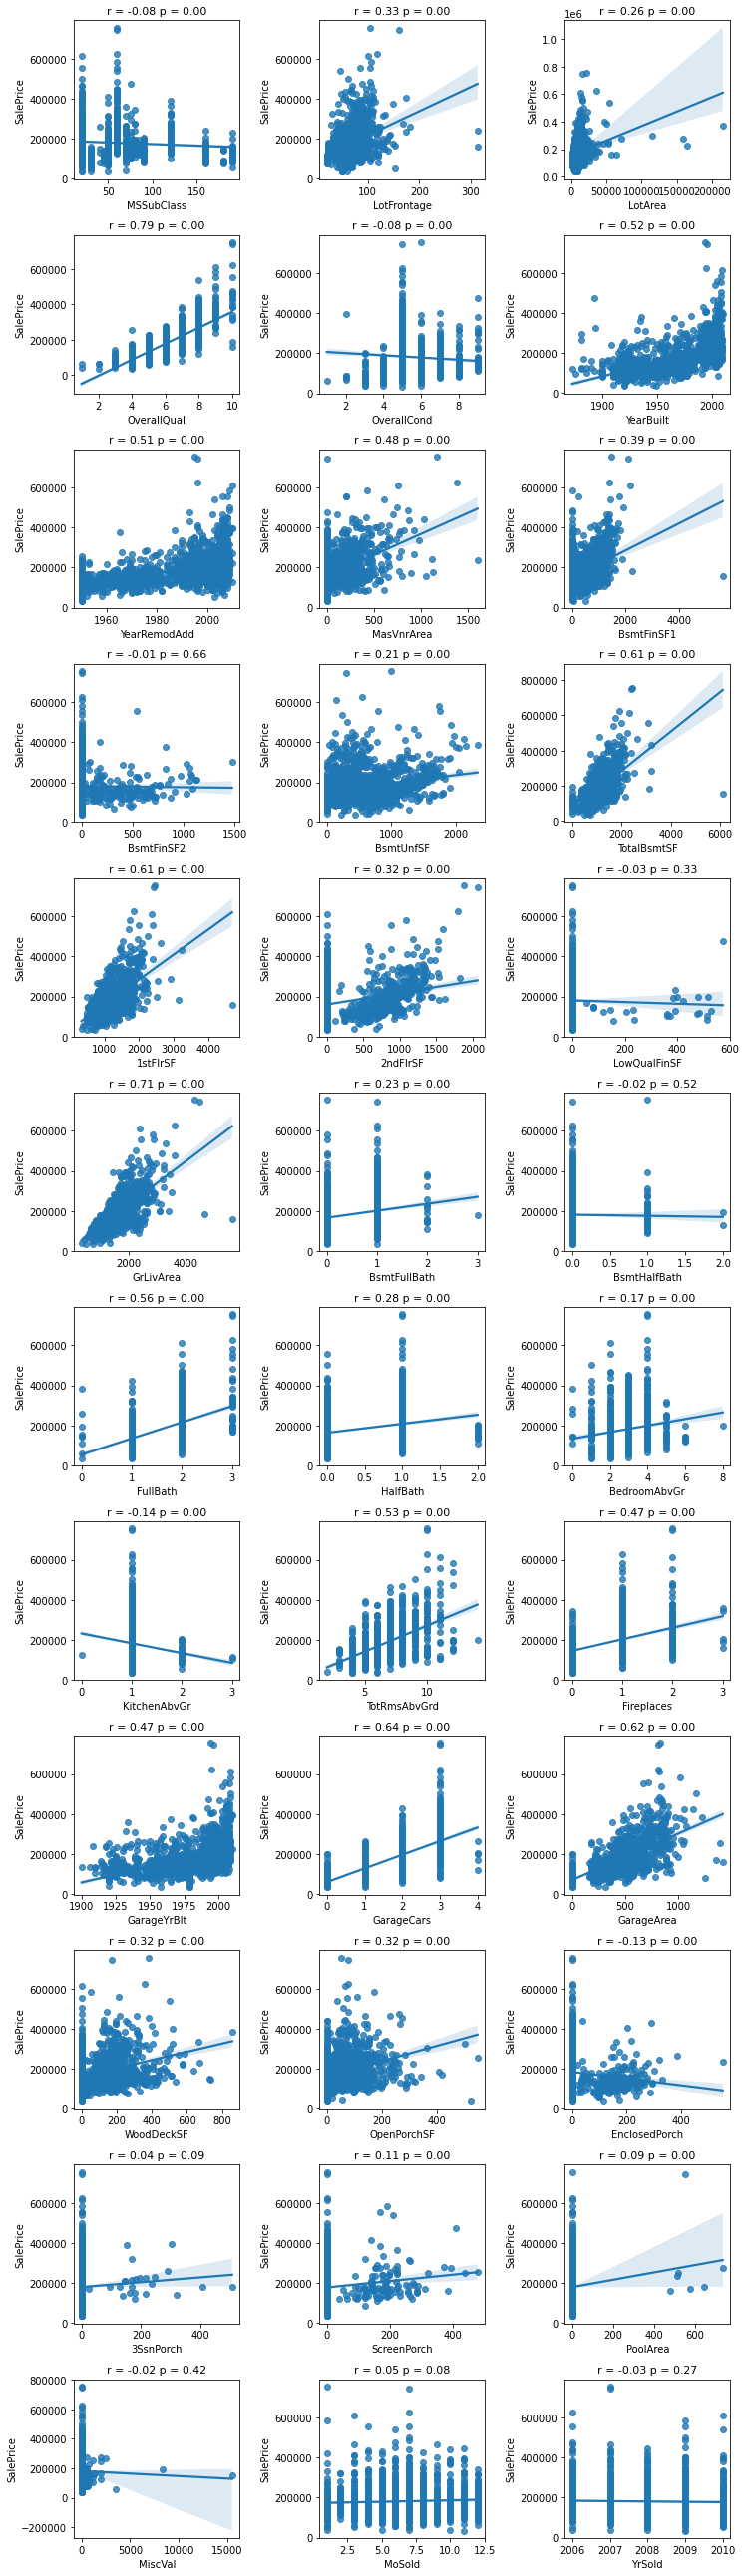

In [28]:
nr_rows = 12
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

li_num_feats = list(numerical_feats)
li_not_plot = ['Id', 'SalePrice', 'SalePrice_Log']
li_plot_num_feats = [c for c in list(numerical_feats) if c not in li_not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(df_train[li_plot_num_feats[i]], df_train['SalePrice'], ax = axs[r][c])
            stp = stats.pearsonr(df_train[li_plot_num_feats[i]], df_train['SalePrice'])
            str_title = "r = " + "{0:.2f}".format(stp[0]) +  " p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()  

Видим, что есть переменные, у которых прослеживается линейная зависимость с `SalePrice` (при увеличении значения такой переменной пропорционально растет и `SalePrice`). 
Такие переменные и будем использовать в нашей линейной модели! Установим порог для коэффициента корреляции > 0.6 (он характерен для умеренной корреляции). Использование этих переменных в линейной регрессии имеет простую интерпретацию:
- `SalePrice` = $\alpha + \beta \cdot X + \varepsilon$: если $X$ вырастет на 1 ед., то `SalePrice` вырастет на $\beta \cdot 1$ ед.

Также по графикам выше заметно, что у некоторых переменных может наблюдаться проблема гетероскедастичности (например, у `GrLivArea` видно, что с увеличением значений растет разброс значений - чтобы этого избежать может помочь применение функционального преобразования, а именно логарифма, но пока не будем делать дополнительные переменные, чтобы не рушить простую интерпретацию).

Отберем соответствующие переменные:

In [29]:
min_val_corr = 0.5
corr = df_train.corr()
corr_abs = corr.abs()

nr_num_cols = len(numerical_feats)
ser_corr = corr_abs.nlargest(nr_num_cols, 'SalePrice')['SalePrice']
cols_abv_corr_limit = list(ser_corr[ser_corr.values > min_val_corr].index)

In [30]:
#cols_abv_corr_limit.remove('SalePrice')
cols_abv_corr_limit.remove('SalePrice_Log')
cols_abv_corr_limit

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd']

Построим корреляционную матрицу для оставшихся переменных:

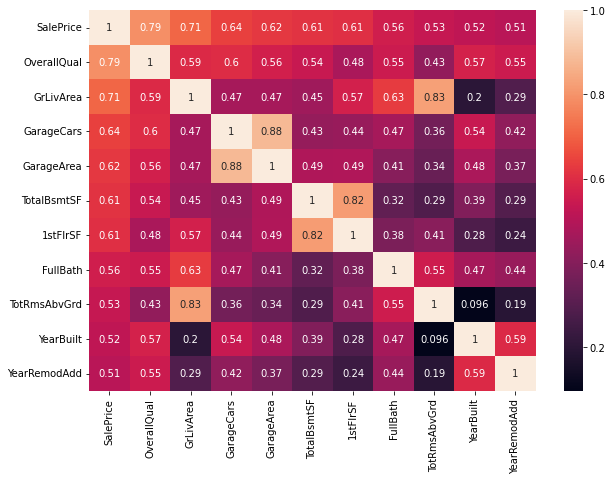

In [31]:
plt.figure(figsize=(10, 7))
sns.heatmap(df_train[cols_abv_corr_limit].corr(), annot=True);

Видим, что переменные `TotRmsAbvGrd`, 'GarageArea', '1stFlrSF' нельзя использовать в одной линейной модели (из-за проблемы мультиколлинеарности), поэтому также уберем их:

In [32]:
cols_abv_corr_limit.remove('TotRmsAbvGrd')
cols_abv_corr_limit.remove('GarageArea')
cols_abv_corr_limit.remove('1stFlrSF')
cols_abv_corr_limit

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'TotalBsmtSF',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd']

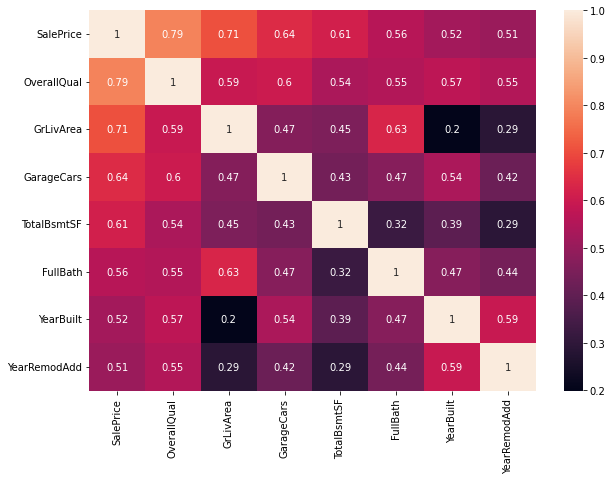

In [33]:
plt.figure(figsize=(10, 7))
sns.heatmap(df_train[cols_abv_corr_limit].corr(),  annot=True);

Теперь явных проблем с мультиколлинеарностью не видно => можно переходить к категориальным признакам. 

### Анализ категориальных переменных

Построим сначала диаграмму частот встречамости для каждого из признаков:

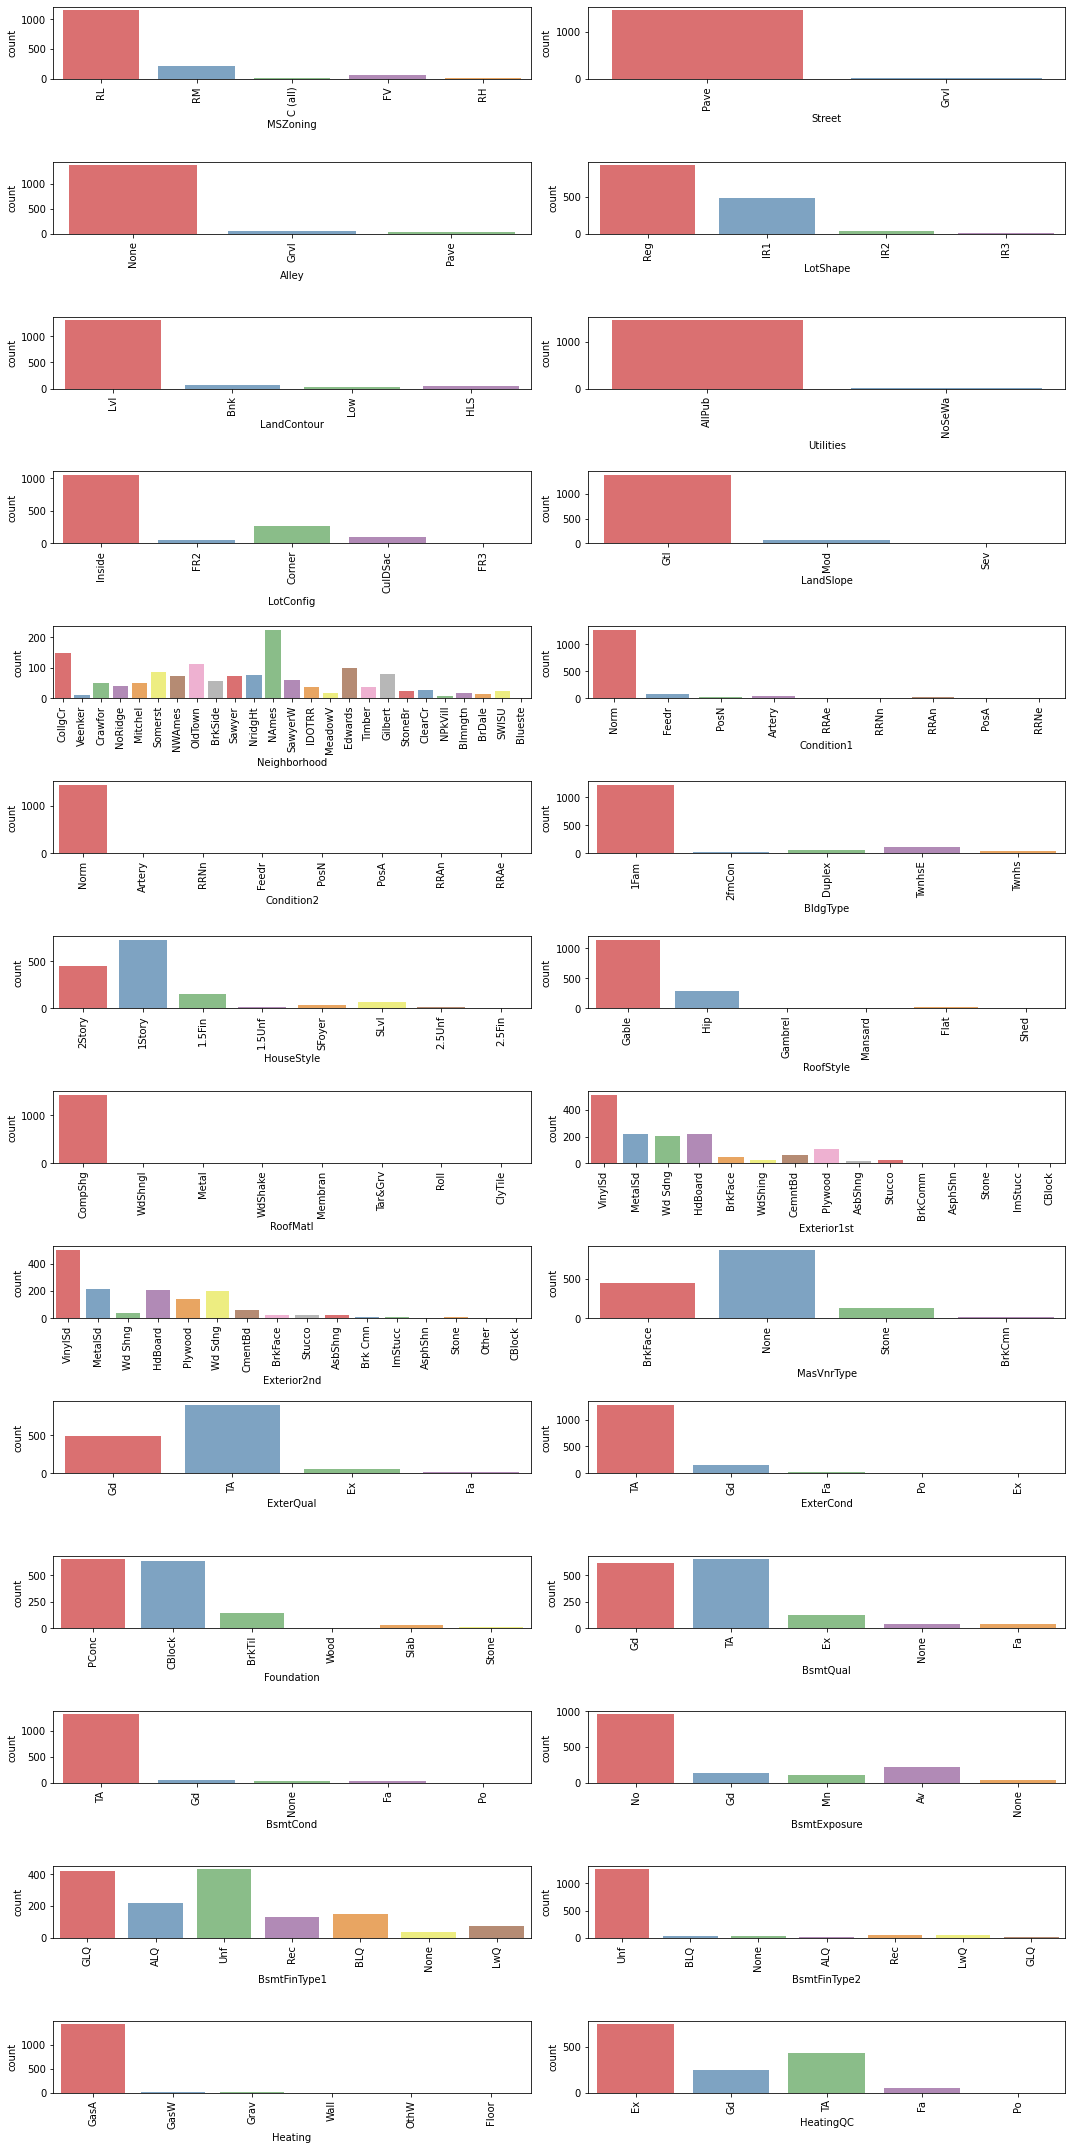

In [34]:
fig, axes = plt.subplots(int((len(categorical_feats) / 3)), 2, figsize=(15, 30))

for i, ax in enumerate(fig.axes):
    # plot barplot of each feature
    if i < len(categorical_feats) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        sns.countplot(x=categorical_feats[i], alpha=0.7, data=df_train, ax=ax, palette = "Set1")

fig.tight_layout()

Видим, что у многих признаков наблюдается явных дисбаланс классов внутри (1 группа доминирует над всеми остальными) => такие признаки не дадут полезной информации для построения линейной модели, поэтому их можно убрать из рассмотрения.

In [35]:
cols_to_drop = [
    'Alley',
    'Street',
    'LandContour',
    'Utilities',
    'LandSlope',
    'Condition1',
    'Condition2',
    'RoofMatl',
    'BsmtCond',
    'BsmtFinType2',
    'Heating',
    'CentralAir',
    'Electrical',
    'Functional',
    'GarageQual',
    'GarageCond',
    'PavedDrive'
]

In [36]:
categorical_feats = [feat for feat in categorical_feats if feat not in cols_to_drop]
len(categorical_feats)

26

Посмотрим насколько `SalePrice` изменчива в завимости от оставшихся признаков (нас будет интересовать те признаки, у которых эта изменчивость заметна).

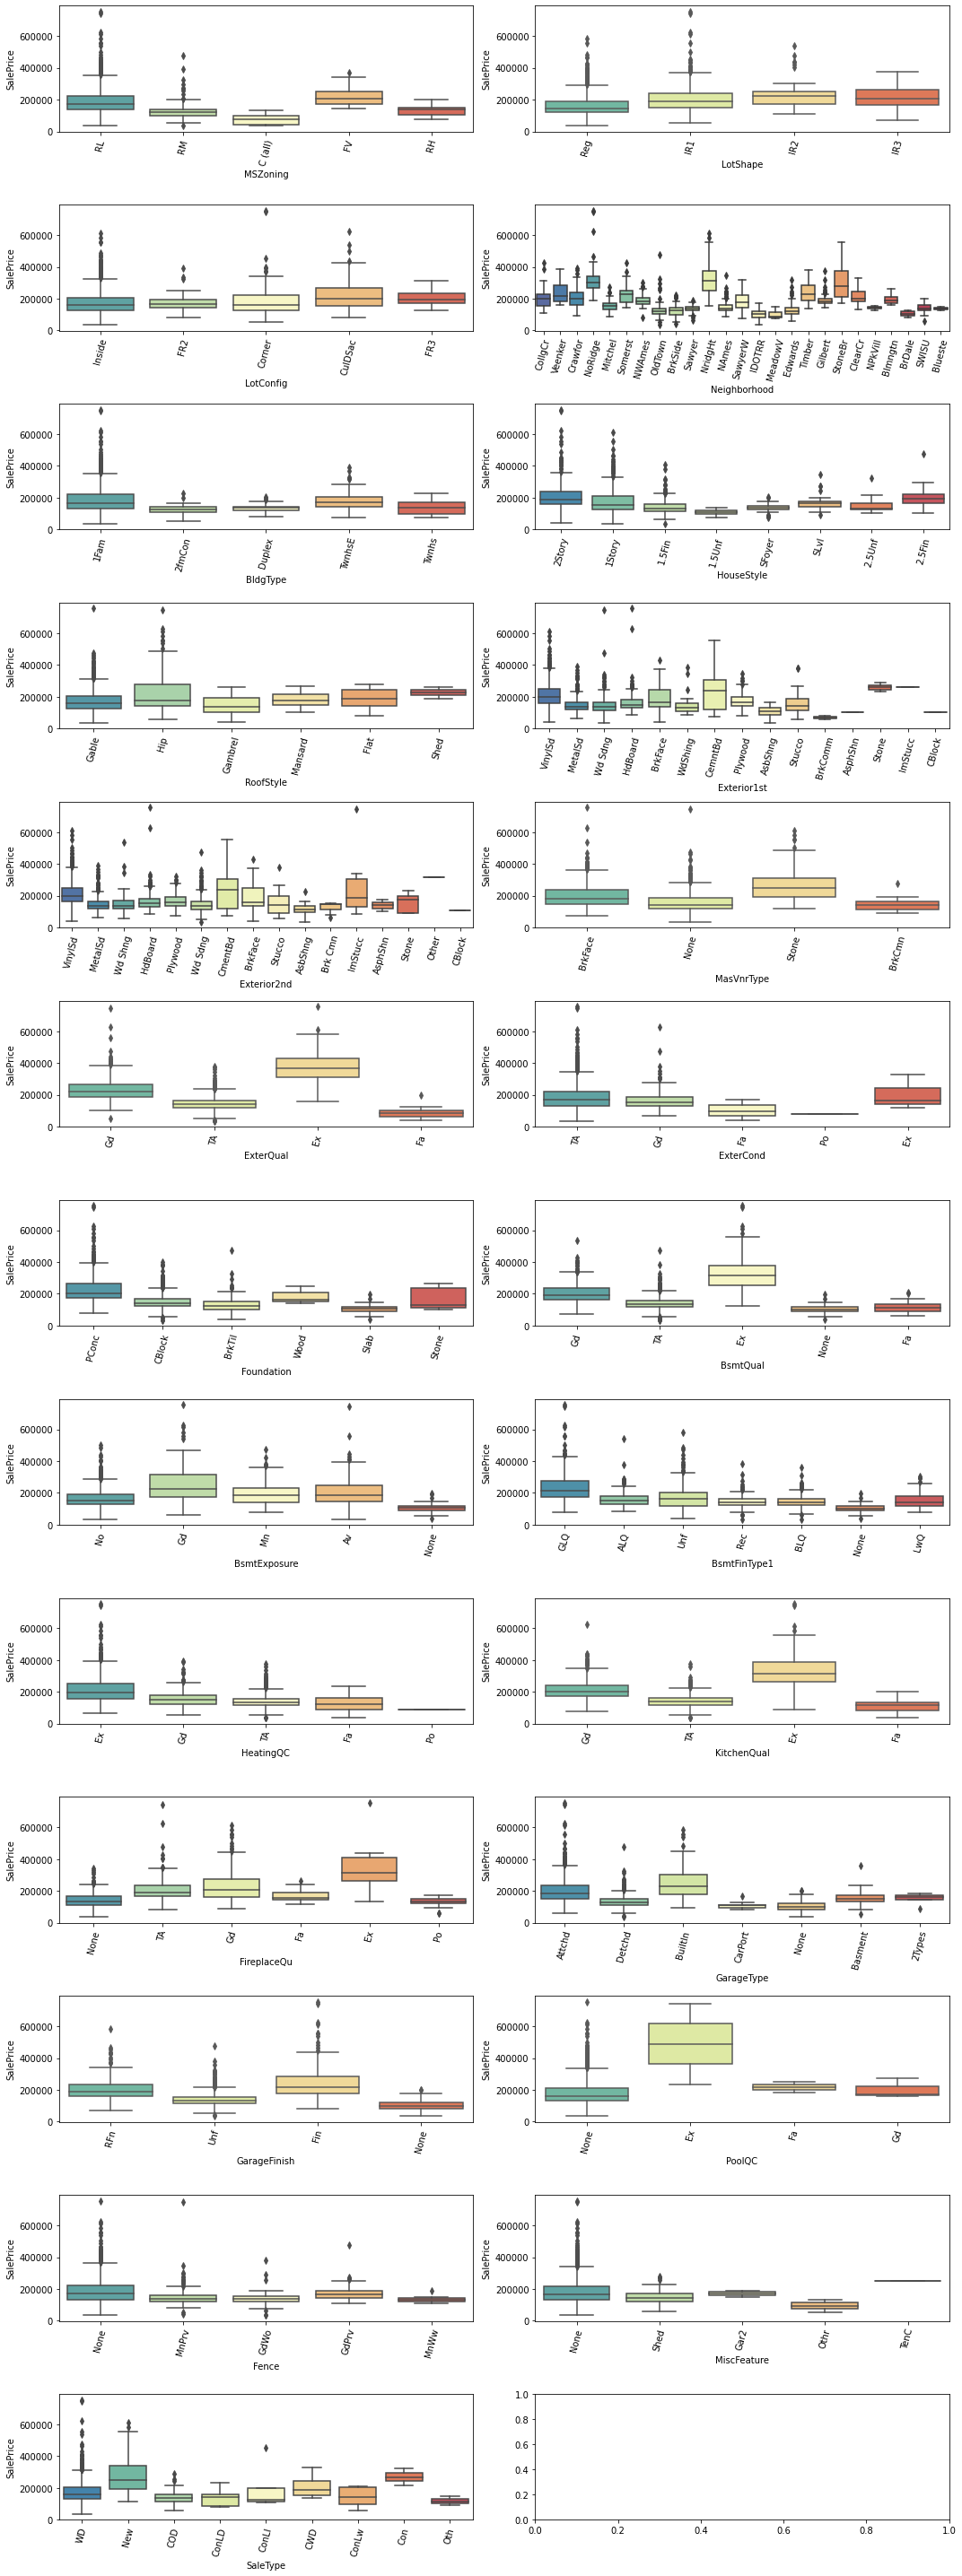

In [37]:
fig, axes = plt.subplots(
    len(categorical_feats)//2, 2, figsize=(15, 40))
for i, ax in enumerate(fig.axes):
    # plot the variation of SalePrice in each feature
    if i < len(categorical_feats) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=75)
        sns.boxplot(x=categorical_feats[i], y="SalePrice", data=df_train, ax=ax, palette="Spectral_r")

fig.tight_layout()

Видим, что таких переменных, где цена сильно меняется в зависимости от класса внутри одного признака, не так уж и много - оставим им, а остальные (где цена почти не отличается) уберем.

In [38]:
cols_to_drop = [
    'LotShape',
    'LotConfig',
    'BldgType',
    'HouseStyle',
    'RoofStyle',
    'Exterior1st', 
    'Exterior2nd',
    'Foundation',
    'BsmtExposure',
    'BsmtFinType1',
    'HeatingQC',
    'Fence',
    'MiscFeature',
    'SaleCondition',
    'ExterCond',
]
categorical_feats = [feat for feat in categorical_feats if feat not in cols_to_drop]

Таким образом, получили следующий набор категориальных переменных:

In [39]:
categorical_feats

['MSZoning',
 'Neighborhood',
 'MasVnrType',
 'ExterQual',
 'BsmtQual',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'PoolQC',
 'SaleType']

### Строим модель

Перейдем к построению линейной модели.   
С числовыми переменными все просто - добавим их без преобразований (это скажется на качестве модели, но поможет легче ее интерпретировать).   
Для того чтобы учесть категориальные переменные воспользуемся One Hot кодированием.

In [40]:
df_ = pd.DataFrame()
df_ = df_train[cols_abv_corr_limit]
df_ = pd.concat([df_, pd.get_dummies(df_train['MSZoning'], prefix='MSZoning')], axis=1)
df_ = pd.concat([df_, pd.get_dummies(df_train['Neighborhood'], prefix='Neighborhood')], axis=1)
df_ = pd.concat([df_, pd.get_dummies(df_train['MasVnrType'], prefix='MasVnrType')], axis=1)
df_ = pd.concat([df_, pd.get_dummies(df_train['ExterQual'], prefix='ExterQual')], axis=1)
df_ = pd.concat([df_, pd.get_dummies(df_train['BsmtQual'], prefix='BsmtQual')], axis=1)
df_ = pd.concat([df_, pd.get_dummies(df_train['KitchenQual'], prefix='KitchenQual')], axis=1)
df_ = pd.concat([df_, pd.get_dummies(df_train['FireplaceQu'], prefix='FireplaceQu')], axis=1)
df_ = pd.concat([df_, pd.get_dummies(df_train['GarageType'], prefix='GarageType')], axis=1)
df_ = pd.concat([df_, pd.get_dummies(df_train['GarageFinish'], prefix='GarageFinish')], axis=1)
df_ = pd.concat([df_, pd.get_dummies(df_train['PoolQC'], prefix='PoolQC')], axis=1)
df_ = pd.concat([df_, pd.get_dummies(df_train['SaleType'], prefix='SaleType')], axis=1)
df_.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,MSZoning_C (all),MSZoning_FV,...,PoolQC_None,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,208500,7,1710,2,856,2,2003,2003,0,0,...,1,0,0,0,0,0,0,0,0,1
1,181500,6,1262,2,1262,2,1976,1976,0,0,...,1,0,0,0,0,0,0,0,0,1
2,223500,7,1786,2,920,2,2001,2002,0,0,...,1,0,0,0,0,0,0,0,0,1
3,140000,7,1717,3,756,1,1915,1970,0,0,...,1,0,0,0,0,0,0,0,0,1
4,250000,8,2198,3,1145,2,2000,2000,0,0,...,1,0,0,0,0,0,0,0,0,1


In [41]:
X = df_.copy()
X.drop('SalePrice', axis=1, inplace=True)
X.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,PoolQC_None,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,7,1710,2,856,2,2003,2003,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,6,1262,2,1262,2,1976,1976,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,7,1786,2,920,2,2001,2002,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,7,1717,3,756,1,1915,1970,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,8,2198,3,1145,2,2000,2000,0,0,0,...,1,0,0,0,0,0,0,0,0,1


Для того чтобы учесть проблемы возможной гетерескедастичности (неоднородности ошибок) воспользуемся робастными методами подсчета оценок дисперсии:

In [42]:
exog = sm.add_constant(X)
model_classic = sm.OLS(endog=df_train['SalePrice'], exog=exog).fit()
model_classic.get_robustcov_results(cov_type = 'HC0').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     2117.
Date:                Wed, 24 Aug 2022   Prob (F-statistic):               0.00
Time:                        02:34:18   Log-Likelihood:                -17150.
No. Observations:                1460   AIC:                         3.445e+04
Df Residuals:                    1387   BIC:                         3.483e+04
Df Model:                          72                                         
Covariance Type:                  HC0                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.656e+05   6.17e+04     -2.686      0.007   -2.87e+05   -4.46e+04
OverallQual           9398.0952   1252.537      7.503      0.000    6941.024    1.19e+04
GrLivArea               41.2970      6.030      6.848      0.000      29.468      53.126
GarageCars             1.43e+04   2421.739      5.904      0.000    9547.794     1.9e+04
TotalBsmtSF             17.5799      8.463      2.077      0.038       0.979      34.181
FullBath                49.0055   3552.975      0.014      0.989   -6920.780    7018.791
YearBuilt               86.3338     80.634      1.071      0.284     -71.844     244.512
YearRemodAdd           187.2002     48.538      3.857      0.000      91.985     282.415
MSZoning_C (all)     -6.078e+04   1.49e+04     -4.075      0.000      -9e+04   -3.15e+04
MSZoning_FV          -2.076e+04   1.38e+04     -1.508      0.132   -4.78e+04    6248.462
MSZoning_RH          -2.657e+04   1.41e+04     -1.878      0.061   -5.43e+04    1182.166
MSZoning_RL          -2.104e+04   1.33e+04     -1.581      0.114   -4.71e+04    5059.531
MSZoning_RM          -3.645e+04   1.36e+04     -2.688      0.007   -6.31e+04   -9850.526
Neighborhood_Blmngtn -3.315e+04   7552.605     -4.389      0.000    -4.8e+04   -1.83e+04
Neighborhood_Blueste -2.644e+04   8614.247     -3.069      0.002   -4.33e+04   -9541.797
Neighborhood_BrDale  -1.648e+04   5240.285     -3.145      0.002   -2.68e+04   -6202.154
Neighborhood_BrkSide -4105.1322   3539.985     -1.160      0.246    -1.1e+04    2839.171
Neighborhood_ClearCr  9687.6215   7885.438      1.229      0.219   -5781.052    2.52e+04
Neighborhood_CollgCr -5639.8081   4530.104     -1.245      0.213   -1.45e+04    3246.788
Neighborhood_Crawfor  1.488e+04   5496.630      2.706      0.007    4093.196    2.57e+04
Neighborhood_Edwards -2.337e+04   4798.194     -4.872      0.000   -3.28e+04    -1.4e+04
Neighborhood_Gilbert -1.915e+04   4880.735     -3.924      0.000   -2.87e+04   -9577.986
Neighborhood_IDOTRR  -4467.2233   4804.176     -0.930      0.353   -1.39e+04    4957.012
Neighborhood_MeadowV -1.874e+04   5766.569     -3.249      0.001      -3e+04   -7425.328
Neighborhood_Mitchel -1.696e+04   5310.132     -3.194      0.001   -2.74e+04   -6541.374
Neighborhood_NAmes   -1.529e+04   3474.851     -4.400      0.000   -2.21e+04   -8474.273
Neighborhood_NPkVill -3.084e+04   4980.539     -6.192      0.000   -4.06e+04   -2.11e+04
Neighborhood_NWAmes  -1.702e+04   3830.923     -4.443      0.000   -2.45e+04   -9506.740
Neighborhood_NoRidge  4.849e+04   1.13e+04      4.303      0.000    2.64e+04    7.06e+04
Neighborhood_NridgHt  1.138e+04   1.08e+04      1.056      0.291   -9769.938    3.25e+04
Neighborhood_OldTown -1.534e+04   3788.874     -4.050      0.000   -2.28e+04   -7911.045
Neighborhood_SWISU   -2.196e+04   4949.766     -4.437    

Так как у нас появилось огромное число дополнительных переменных в результате One Hot кодирования, то для оценки качества моедли будем использовать AIC и BIC, которые учитывают в себе количество используемых переменных, штрафуя за их большое количество -> должны быть как можно меньше
Удалим незначимые переменные (те, что имеют pvalue > $\alpha=0.05$) и посмотрим за качеством:

In [43]:
exog = exog.drop(['FullBath', 'YearBuilt', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
          'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 
           'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_IDOTRR',
          'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_SawyerW',
          'Neighborhood_Timber', 'Neighborhood_Veenker', 'ExterQual_Ex',
          'BsmtQual_Ex', 'KitchenQual_Ex', 'FireplaceQu_Ex', 'GarageType_Attchd',
          'GarageType_Basment', 'GarageType_BuiltIn', 'PoolQC_Fa', 'SaleType_CWD', 
          'SaleType_Con', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_Oth'], 
          axis=1)

In [44]:
model_classic = sm.OLS(endog=df_train['SalePrice'], exog=exog).fit()
model_classic.get_robustcov_results(cov_type = 'HC0').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     3896.
Date:                Wed, 24 Aug 2022   Prob (F-statistic):               0.00
Time:                        02:34:18   Log-Likelihood:                -17167.
No. Observations:                1460   AIC:                         3.444e+04
Df Residuals:                    1407   BIC:                         3.472e+04
Df Model:                          52                                         
Covariance Type:                  HC0                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.663e+05   6.87e+04     -2.422      0.016   -3.01e+05   -3.16e+04
OverallQual           9402.2867   1247.178      7.539      0.000    6955.757    1.18e+04
GrLivArea               40.3881      5.320      7.591      0.000      29.952      50.825
GarageCars            1.516e+04   2622.020      5.781      0.000       1e+04    2.03e+04
TotalBsmtSF             19.1270      8.028      2.383      0.017       3.379      34.875
YearRemodAdd           199.5835     48.627      4.104      0.000     104.195     294.972
MSZoning_C (all)     -4.226e+04   9435.343     -4.479      0.000   -6.08e+04   -2.38e+04
MSZoning_RM          -1.891e+04   2822.546     -6.700      0.000   -2.44e+04   -1.34e+04
Neighborhood_Blmngtn -3.144e+04   7294.197     -4.310      0.000   -4.57e+04   -1.71e+04
Neighborhood_Crawfor  1.472e+04   5556.952      2.649      0.008    3818.999    2.56e+04
Neighborhood_Edwards -2.127e+04   5308.657     -4.007      0.000   -3.17e+04   -1.09e+04
Neighborhood_Gilbert -1.569e+04   3887.998     -4.036      0.000   -2.33e+04   -8064.326
Neighborhood_MeadowV -1.169e+04   5467.756     -2.139      0.033   -2.24e+04    -967.662
Neighborhood_Mitchel -1.381e+04   4389.655     -3.146      0.002   -2.24e+04   -5197.312
Neighborhood_NAmes   -1.336e+04   2890.439     -4.621      0.000    -1.9e+04   -7685.568
Neighborhood_NPkVill -2.822e+04   5004.873     -5.638      0.000    -3.8e+04   -1.84e+04
Neighborhood_NWAmes  -1.508e+04   3006.706     -5.014      0.000    -2.1e+04   -9178.350
Neighborhood_NoRidge  5.043e+04   9489.337      5.314      0.000    3.18e+04     6.9e+04
Neighborhood_OldTown -1.172e+04   2980.583     -3.932      0.000   -1.76e+04   -5873.522
Neighborhood_SWISU   -2.175e+04   4901.322     -4.437      0.000   -3.14e+04   -1.21e+04
Neighborhood_Sawyer  -1.258e+04   3402.719     -3.698      0.000   -1.93e+04   -5908.727
Neighborhood_StoneBr  3.217e+04   1.23e+04      2.622      0.009    8098.757    5.62e+04
MasVnrType_BrkCmn    -4.915e+04   1.83e+04     -2.683      0.007   -8.51e+04   -1.32e+04
MasVnrType_BrkFace   -4.093e+04   1.72e+04     -2.380      0.017   -7.47e+04   -7188.922
MasVnrType_None      -4.005e+04   1.74e+04     -2.308      0.021   -7.41e+04   -6010.933
MasVnrType_Stone     -3.619e+04   1.72e+04     -2.101      0.036      -7e+04   -2396.159
ExterQual_Fa         -3.003e+04   1.24e+04     -2.425      0.015   -5.43e+04   -5734.523
ExterQual_Gd           -2.8e+04   1.13e+04     -2.473      0.014   -5.02e+04   -5789.267
ExterQual_TA         -2.686e+04   1.12e+04     -2.404      0.016   -4.88e+04   -4946.349
BsmtQual_Fa          -3.624e+04   7955.179     -4.556      0.000   -5.18e+04   -2.06e+04
BsmtQual_Gd          -3.058e+04   6331.223     -4.830      0.000    -4.3e+04   -1.82e+04
BsmtQual_None        -3.137e+04   1.09e+04     -2.875    

Видим, что AIC и BIC слегка уменьшились => продолжим убирать незначимые переменные:

In [45]:
exog = exog.drop(['Neighborhood_MeadowV', 'MasVnrType_Stone', 'FireplaceQu_Gd', 
                 'FireplaceQu_Po', 'FireplaceQu_TA', 'GarageType_CarPort', 
                 'GarageFinish_Fin', 'PoolQC_None', 'SaleType_ConLD', 
                  'SaleType_New', 'SaleType_WD', 'MasVnrType_BrkCmn', 
                  'MasVnrType_BrkFace', 'MasVnrType_None', 'FireplaceQu_Fa',
                 'GarageType_None', 'GarageFinish_None'], 
          axis=1)

In [46]:
model_classic = sm.OLS(endog=df_train['SalePrice'], exog=exog).fit()
model_classic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     206.1
Date:                Wed, 24 Aug 2022   Prob (F-statistic):               0.00
Time:                        02:34:19   Log-Likelihood:                -17176.
No. Observations:                1460   AIC:                         3.443e+04
Df Residuals:                    1421   BIC:                         3.464e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -3.056e+05    1.2e+05     -2.536      0.011   -5.42e+05   -6.92e+04
OverallQual           9966.4604   1154.816      8.630      0.000    7701.133    1.22e+04
GrLivArea               39.7306      2.321     17.116      0.000      35.177      44.284
GarageCars            1.574e+04   1658.243      9.494      0.000    1.25e+04     1.9e+04
TotalBsmtSF             20.2214      2.797      7.229      0.000      14.734      25.709
YearRemodAdd           213.2918     60.075      3.550      0.000      95.447     331.136
MSZoning_C (all)     -4.354e+04   1.07e+04     -4.059      0.000   -6.46e+04   -2.25e+04
MSZoning_RM          -2.028e+04   3179.488     -6.378      0.000   -2.65e+04    -1.4e+04
Neighborhood_Blmngtn -3.227e+04   8031.422     -4.018      0.000    -4.8e+04   -1.65e+04
Neighborhood_Crawfor  1.477e+04   4936.736      2.992      0.003    5084.286    2.45e+04
Neighborhood_Edwards -2.021e+04   3855.476     -5.242      0.000   -2.78e+04   -1.26e+04
Neighborhood_Gilbert -1.511e+04   4169.909     -3.624      0.000   -2.33e+04   -6930.639
Neighborhood_Mitchel -1.358e+04   5023.313     -2.704      0.007   -2.34e+04   -3729.441
Neighborhood_NAmes   -1.356e+04   3191.382     -4.250      0.000   -1.98e+04   -7303.368
Neighborhood_NPkVill -2.826e+04   1.08e+04     -2.609      0.009   -4.95e+04   -7009.976
Neighborhood_NWAmes  -1.591e+04   4299.211     -3.701      0.000   -2.43e+04   -7479.634
Neighborhood_NoRidge  4.719e+04   5494.296      8.588      0.000    3.64e+04     5.8e+04
Neighborhood_OldTown -1.045e+04   4090.660     -2.554      0.011   -1.85e+04   -2425.192
Neighborhood_SWISU   -2.177e+04   6971.207     -3.123      0.002   -3.54e+04   -8099.259
Neighborhood_Sawyer  -1.314e+04   4387.835     -2.995      0.003   -2.17e+04   -4534.476
Neighborhood_StoneBr   3.27e+04   6601.012      4.954      0.000    1.98e+04    4.56e+04
ExterQual_Fa         -3.272e+04   1.15e+04     -2.835      0.005   -5.54e+04   -1.01e+04
ExterQual_Gd         -2.892e+04   5884.549     -4.914      0.000   -4.05e+04   -1.74e+04
ExterQual_TA         -2.846e+04   6508.424     -4.372      0.000   -4.12e+04   -1.57e+04
BsmtQual_Fa          -3.972e+04   7429.579     -5.346      0.000   -5.43e+04   -2.51e+04
BsmtQual_Gd          -3.406e+04   4052.430     -8.404      0.000    -4.2e+04   -2.61e+04
BsmtQual_None        -3.362e+04   7844.272     -4.286      0.000    -4.9e+04   -1.82e+04
BsmtQual_TA          -3.322e+04   4787.433     -6.939      0.000   -4.26e+04   -2.38e+04
KitchenQual_Fa       -3.651e+04   7488.274     -4.876      0.000   -5.12e+04   -2.18e+04
KitchenQual_Gd       -2.787e+04   4382.619     -6.359      0.000   -3.65e+04   -1.93e+04
KitchenQual_TA       -3.326e+04   4935.968     -6.738      0.000   -4.29e+04   -2.36e+04
FireplaceQu_None     -8079.4050   2038.049     -3.964    

Попробуем исправить возможную проблемы мультиколлиарности => подсчитаем VIF для каждой из оставшихся переменных и удалим те из них, у которых VIF будет слишком большим (>10):

In [47]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    exog.values, i) for i in range(exog.shape[1])]

# VIF results in a table
vif["features"] = exog.columns
vif.round(1)

,VIF Factor,features
0,21300.3,const
1,3.7,OverallQual
2,2.2,GrLivArea
3,2.3,GarageCars
4,2.2,TotalBsmtSF
5,2.3,YearRemodAdd
6,1.1,MSZoning_C (all)
7,1.9,MSZoning_RM
8,1.1,Neighborhood_Blmngtn
9,1.2,Neighborhood_Crawfor


Видим, что под удаление попадают только 2 переменные: 
- `ExterQual_Gd`
- `ExterQual_TA`

In [48]:
exog1 = exog.drop(['ExterQual_Gd', 'ExterQual_TA'], 
          axis=1)
model_classic = sm.OLS(endog=df_train['SalePrice'], exog=exog1).fit()
model_classic.get_robustcov_results(cov_type = 'HC0').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     182.4
Date:                Wed, 24 Aug 2022   Prob (F-statistic):               0.00
Time:                        02:34:20   Log-Likelihood:                -17189.
No. Observations:                1460   AIC:                         3.445e+04
Df Residuals:                    1423   BIC:                         3.465e+04
Df Model:                          36                                         
Covariance Type:                  HC0                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -3.469e+05   1.03e+05     -3.380      0.001   -5.48e+05   -1.46e+05
OverallQual           1.059e+04   1143.930      9.261      0.000    8349.434    1.28e+04
GrLivArea               39.8622      5.183      7.690      0.000      29.694      50.030
GarageCars            1.564e+04   2079.947      7.518      0.000    1.16e+04    1.97e+04
TotalBsmtSF             21.6566      8.032      2.696      0.007       5.902      37.411
YearRemodAdd           222.8962     49.156      4.534      0.000     126.470     319.322
MSZoning_C (all)     -4.234e+04   8871.030     -4.773      0.000   -5.97e+04   -2.49e+04
MSZoning_RM          -1.985e+04   2999.741     -6.617      0.000   -2.57e+04    -1.4e+04
Neighborhood_Blmngtn -3.371e+04   7158.718     -4.709      0.000   -4.78e+04   -1.97e+04
Neighborhood_Crawfor  1.525e+04   5763.739      2.646      0.008    3943.543    2.66e+04
Neighborhood_Edwards -1.965e+04   5110.458     -3.844      0.000   -2.97e+04   -9621.608
Neighborhood_Gilbert  -1.42e+04   4032.747     -3.521      0.000   -2.21e+04   -6287.203
Neighborhood_Mitchel -1.435e+04   4400.527     -3.260      0.001    -2.3e+04   -5712.925
Neighborhood_NAmes   -1.309e+04   2718.825     -4.815      0.000   -1.84e+04   -7757.907
Neighborhood_NPkVill -2.759e+04   5154.839     -5.352      0.000   -3.77e+04   -1.75e+04
Neighborhood_NWAmes  -1.569e+04   2986.743     -5.255      0.000   -2.16e+04   -9836.084
Neighborhood_NoRidge   4.63e+04   9732.981      4.757      0.000    2.72e+04    6.54e+04
Neighborhood_OldTown -1.056e+04   3043.516     -3.471      0.001   -1.65e+04   -4594.705
Neighborhood_SWISU   -2.144e+04   4919.800     -4.357      0.000   -3.11e+04   -1.18e+04
Neighborhood_Sawyer  -1.266e+04   3305.368     -3.832      0.000   -1.91e+04   -6180.834
Neighborhood_StoneBr  3.155e+04   1.28e+04      2.470      0.014    6487.818    5.66e+04
ExterQual_Fa         -3488.0593   5267.042     -0.662      0.508   -1.38e+04    6843.941
BsmtQual_Fa          -4.455e+04   7914.358     -5.629      0.000   -6.01e+04    -2.9e+04
BsmtQual_Gd          -3.952e+04   6099.053     -6.480      0.000   -5.15e+04   -2.76e+04
BsmtQual_None        -3.657e+04   1.05e+04     -3.486      0.001   -5.71e+04    -1.6e+04
BsmtQual_TA            -3.8e+04   6542.062     -5.809      0.000   -5.08e+04   -2.52e+04
KitchenQual_Fa       -4.261e+04   7136.994     -5.970      0.000   -5.66e+04   -2.86e+04
KitchenQual_Gd       -3.527e+04   6400.504     -5.511      0.000   -4.78e+04   -2.27e+04
KitchenQual_TA       -3.973e+04   6414.726     -6.193      0.000   -5.23e+04   -2.71e+04
FireplaceQu_None     -7904.5329   2144.445     -3.686      0.000   -1.21e+04   -3697.920
GarageType_2Types    -4.407e+04   8496.508     -5.186      0.000   -6.07e+04   -2.74e+04
GarageType_Detchd    -6559.9073   2411.397     -2.720    

Видим, что это изменение не принесло улучшения AIC и BIC.
Однако сами по себе эти переменные довольно странны - у них отрицательный коэффициент, а значит увеличение этих переменных на единицу (а значит соответствие данному классу) снижает `SalePrice`. А ведь `ExterQual_TA` означает использование типичных материалов, а `ExterQual_Gd` и вовсе хорошее. Это противоречит здравому смыслу, поэтому тоже уберем их из модели. 

Уберем те признаки, которые также не должны иметь отрицательные коэффциенты: 
- MSZoning_C (all)
- MSZoning_RM
- BsmtQual_Gd
- KitchenQual_Gd
- KitchenQual_TA
- GarageType_2Types
- GarageFinish_RFn
- GarageFinish_Unf
- PoolQC_Gd
- BsmtQual_None  

Получим:

In [49]:
exog2 = exog1.drop(['MSZoning_C (all)', 'MSZoning_RM', 'BsmtQual_Gd',
                   'KitchenQual_Gd', 'KitchenQual_TA', 'GarageType_2Types',
                   'GarageFinish_RFn', 'GarageFinish_Unf', 'PoolQC_Gd',
                   'PoolQC_Ex', 'PoolQC_Gd', 'ExterQual_Fa', 'BsmtQual_None',
                    'BsmtQual_Fa', 'BsmtQual_TA', 'KitchenQual_Fa', 'GarageType_Detchd'], 
          axis=1)
model_classic = sm.OLS(endog=df_train['SalePrice'], exog=exog2).fit()
model_classic.get_robustcov_results(cov_type = 'HC0').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     160.5
Date:                Wed, 24 Aug 2022   Prob (F-statistic):               0.00
Time:                        02:34:20   Log-Likelihood:                -17384.
No. Observations:                1460   AIC:                         3.481e+04
Df Residuals:                    1439   BIC:                         3.492e+04
Df Model:                          20                                         
Covariance Type:                  HC0                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -8.199e+05   8.82e+04     -9.300      0.000   -9.93e+05   -6.47e+05
OverallQual           1.721e+04   1418.095     12.135      0.000    1.44e+04       2e+04
GrLivArea               42.9314      7.031      6.106      0.000      29.140      56.722
GarageCars              1.6e+04   2527.889      6.330      0.000     1.1e+04     2.1e+04
TotalBsmtSF             29.9495     10.071      2.974      0.003      10.194      49.705
YearRemodAdd           393.5042     46.693      8.427      0.000     301.910     485.099
Neighborhood_Blmngtn -3.605e+04   6040.695     -5.967      0.000   -4.79e+04   -2.42e+04
Neighborhood_Crawfor  1.127e+04   5597.331      2.013      0.044     290.273    2.22e+04
Neighborhood_Edwards -1.165e+04   6243.382     -1.866      0.062   -2.39e+04     595.152
Neighborhood_Gilbert -1.458e+04   4035.261     -3.614      0.000   -2.25e+04   -6669.044
Neighborhood_Mitchel -1.121e+04   3416.777     -3.279      0.001   -1.79e+04   -4502.751
Neighborhood_NAmes   -6880.4441   2266.414     -3.036      0.002   -1.13e+04   -2434.614
Neighborhood_NPkVill -2.846e+04   5650.734     -5.037      0.000   -3.95e+04   -1.74e+04
Neighborhood_NWAmes  -1.794e+04   3266.627     -5.493      0.000   -2.44e+04   -1.15e+04
Neighborhood_NoRidge  3.871e+04   1.21e+04      3.202      0.001     1.5e+04    6.24e+04
Neighborhood_OldTown -2.479e+04   3254.015     -7.617      0.000   -3.12e+04   -1.84e+04
Neighborhood_SWISU   -1.908e+04   6119.749     -3.118      0.002   -3.11e+04   -7078.547
Neighborhood_Sawyer  -6829.8496   3122.754     -2.187      0.029    -1.3e+04    -704.212
Neighborhood_StoneBr  4.087e+04   1.46e+04      2.801      0.005    1.22e+04    6.95e+04
FireplaceQu_None     -1.046e+04   2755.512     -3.797      0.000   -1.59e+04   -5058.247
SaleType_COD         -1.251e+04   4393.904     -2.848      0.004   -2.11e+04   -3894.408
==============================================================================
Omnibus:                      406.917   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38077.474
Skew:                           0.038   Prob(JB):                         0.00
Kurtosis:                      28.019   Cond. No.                     3.33e+05
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 3.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Видим, что мы заметно потеряли в качестве, но теперь у нас хотя бы не будет проблем со здравым смыслом)

### Вывод

Таким образом, получили линейную модель из 20 переменных + 1 константы.
Благодаря линейности и тому факту, что мы не применяли никаких функциональных преобразований к нашим переменным, то мы получили простую интерпретацию - при увеличении той или иной переменной пропорционально будет меняться и наша целевая переменная (`SalePrice`). За это пришлось поплатиться качеством модели, но для первоначального бейзлайна это некритично.  
Скажем о возможных факторах, которые влияют на ценообразование на рынке недвижимости по версии нашей модели (гипотезы по используемым переменным).
Начнем с переменных, имеющих положительный коэффициент (если они увеличатся на единицу, то `SalePrice` тоже увеличится на соответсвующий коэффициент):
- OverallQual (оценка материалов и отделки дома): чем выше оценка, тем качественнее материалы и лучше отделка дома - цена выше.
- GrLivArea (жилая площадь): чем больше площадь дома, тем выше цена (платим ведь за квадратный метр).
- GarageCars (вместимость гаража): если дома есть гараж (вместимость > 0), то это должно поднимать его стоимость.
- TotalBsmtSF (площадь подвала): чем больше подвал, тем больше дом - выше стоимость.
- YearRemodAdd (дата ремонта): чем больше эта дата, тем меньше времени прошло с момента ремонта -> лучше состояние дома и выше его цена.
- Neighborhood (район): в благоприятных районах цена недвижимости должна быть выше.

Теперь скажем о переменных с отрицательным коэффициентом (если они увеличатся на единицу, то `SalePrice`, наоборот, уменьшится на соответсвующий коэффициент):
- Neighborhood (район): неблагоприятный район отрицательно сказывается на стоимости недвижимости.
- FireplaceQu_None (отсутствие камина): отсутствие камина уменьшает стоимость дома.
- SaleType_COD (тип сделки): COD - изъятие дома приставами (явно негативное событие) уменьшает стоимость этого дома.

# №4 (20 баллов)*  
- Это задание со звездочкой
- Баллы за это задание идут как дополнительные баллы
- Общий балл за это домашнее задание не может превышать 100 баллов
- Например, если за предыдущие 3 задания было набрано 100 баллов и за это задание набрано 20 баллов, то итоговый балл будет 100 баллов. Если же за предыдущие 3 задания было набрано 90 баллов и за это задание набрано 20 баллов, то итоговый балл все равно будет 100 баллов

- В далеком XIX веке в Лондоне была эпидемия холеры
- В те времена считалось, что холера передается воздушно-капельным путем
- Но один ученый заподозрил, что это не так. Кол-во заболеваний не уменьшалось при соблюдении всех мер предосторожности при такой передаче заболевания
- Ученого звали John Snow ([Snow 1855](https://mixtape.scunning.com/references.html#ref-Snow1854))
- Разберем его идею к дизайну эксперимента 

**Нулевая гипотеза: холера передается водоснабжением**

- Как бы это проверяли, если бы имели бесконечные ресуры? Опишите идеальный эксперимент.

Можно было бы провести AB-тест: 
- Разделить людей на 2 группы (при этом люди в группах должны быть однородны: одинаковое количество женщин/мужчин, стариков/детей и т.д).
- Первая группа будет пить воду из загрязненного источника, а вторая из чистого. Это жеска((((
- Подсчитать количество заболевших в 2 группах, и если разница окажется стат. значимой, то подтвердится гипотеза о том, что холера передается водоснабжением.

- Но такого сделать мы, конечно, не можем. Однако у нас есть следующая информация
- В 1800-х несколько водоснабжающих компанй обслуживали город. Они все брали воду из Темзы, которая, если верить нашей гипотезе, была зараженной
- Но в 1849 компания Lambeth передвинула свои трубу выше по течению, а компании Southwark и Vauxhall Waterworks Company нет
- Как бы нам это использовать для проверки нашей гипотезы?

Можно использовать потребителей компании Lambeth в качестве контроля (тех, кто пьет чистую воду), а  Southwark и Vauxhall Waterworks в качестве теста (пьют заарженную воду).

- Ниже представлена таблица со смертностью в 1849 г. и 1854 г. для потребителей двух разных компаний

|Компания\Год|1849|1854|
|---|---|---|
|Southwark and Vauxhall|135|147|
|Lambeth|85|19|

- Пусть $Y$ - это смертность
- Пусть $D$ - это влияние чистой воды на смертность от холеры (очевидно, если нулевая гипотеза верна, то это влияние отрицательное)
- Пусть $L$ и $SV$ - это фиксированный эффект\влияние специфичный для каждой из компаний Lambeth и Southwark and Vauxhall, соответственно. Например, у них могут быть разные трубы и\или системы очистки воды

|Компания|Результат|
|---|---|
|Southwark and Vauxhall|$$Y=SV$$|
|Lambeth|$$Y=L+D$$|

- Почему мы не можем просто вычесть из результата Lambeth результат Southwark and Vauxhall?

Для того чтобы оценить воздествие чистой воды (D) нам бы хотелось чтобы тестовая группа отличалась от контроля только этим воздействием (тогда мы можем оценить эффект именно от этого воздействия). В данном же случае тест отличатеся от контроля еще набором факторов, присущим каждой из компаний. Таким образом, даже если мы и выявим разницу между тестом и контролем, то мы не можем сказать, что конкретно привело к этому эффекту (мб люди стали меньше болеть не потому, что пили чистую воду, а у их компаний были другие системы очистки и т.д.)

- Однако, у нас еще есть временные данные
- Пусть $T$ - это некий временной эффект

|Компания|Время|Результат|
|---|---|---|
|Lambeth|До|$$Y=L$$|
||После|$$Y=L+D+T$$|

- Как будет выглядеть эта табличка для Southwark and Vauxhall?
- Чему будет равно $D$ на тех данных, что были выше?

Таблица для Southwark and Vauxhall:

|Компания|Время|Результат|
|---|---|---|
|Southwark and Vauxhall|До|$$Y=SV$$|
||После|$$Y=SV+T$$|

$D$: $D = Y - L - T$

- То, что вы проделали выше называется `DiD` (difference in differences). Это замечательный метод, который позволяет вам контролировать эффект от эксперимента (`treatment`) на какие-то другие переменные
- Он, отнюдь, не ограничивается временным эффектом, но для простоты задания не будет заходить дальше
- Давайте немного формул для понимания того, что было вами проделано. 
    - Вы нашли `D` - эффект, который оказала чистая вода на смертность от холеры. В идеальном мире, мы с вами бы его считали, как $E[Y_{T=1, S=1} - Y_{T=1, S=0}]$, т.е. уровень смертности в один и тот же момент времени ($T=1$) для контрольной ($S=0$) и тестовой ($S=1$) групп. Но, такое не всегда, мягко говоря, возможно.
    - Поэтому вам пришлось изхищряться, чтобы вычленить временной эффект, т.е. вы считали:
    $$D = (E[Y_{T=1}|S=1] - E[Y_{T=0}|S=1]) - (E[Y_{T=1}|S=0] - E[Y_{T=0}|S=0])$$
    - Это, конечно, замечательное число, но значимо ли оно? На этот вопрос нам с вами поможет ответить, в частности, простая линейная регрессия с дамми/бинарными переменными: $\hat{y} = \hat{\beta_0} + \hat{\beta_1} \cdot T + \hat{\beta_2} \cdot S + \hat{\beta_3} \cdot T \cdot S$
    - Если мы с вами посмотрим на $\beta_0$, то при $T=0, S=0 \rightarrow \hat{y} = \hat{\beta_0} \rightarrow E[y|T=0, S=0] = \hat{\beta_0}$ 
    - Хм, а если у нас $T=1, S=0 \rightarrow \hat{y} = \hat{\beta_0} + \hat{\beta_1} \rightarrow \hat{\beta_1} = \hat{y} - \hat{\beta_0} = E[y|T=1, S=0] - E[y|T=0, S=0]$
    - А если $T=0, S=1 \rightarrow \hat{y} = \hat{\beta_0} + \hat{\beta_2} \rightarrow \hat{\beta_2} = \hat{y} - \hat{\beta_0} = E[y|T=0, S=1] - E[y|T=0, S=0]$
    - А если 
    $$T=1, S=1 \rightarrow \hat{y} = \hat{\beta_0} + \hat{\beta_1} + \hat{\beta_2} +\hat{\beta_3} \rightarrow \\
    E[y|T=1, S=1] = E[y|T=0, S=0] + (E[y|T=1, S=0] - E[y|T=0, S=0]) + (E[y|T=0, S=1] - E[y|T=0, S=0]) +\hat{\beta_3} \rightarrow \\
    \hat{\beta_3} = (E[y|T=1, S=1] - E[y|T=0, S=1]) - (E[y|T=1, S=0] - E[y|T=0, S=0])$$
    - А вот и наш эффект, который мы так хотели посчитать и проверить на стат. значимость. Думаю, что вы уже знаете, как проверять стат. значимость коэффициентов линейной регрессии.

- Перейдем к чему-то с данными
- Надо понять маркетинговый эффект от рекламы на билбордах на увеличение депозитов ($\text{deposits}$) с мая ($JUL = 0$) по июль ($JUL = 1$)
- Всего есть 3 билборда в городе Porto Alegre ($POA = 1$) и никаких наших билбордов в городе Florianopolis ($POA = 0$)
- Посчитайте эффект от рекламы и проверьте его на значимость

In [50]:
data = pd.read_csv("HW_001_003.csv")
data.head()

,deposits,poa,jul
0,42,1,0
1,0,1,0
2,52,1,0
3,119,1,0
4,21,1,0


- В чем основная слабость этого подхода?